In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import pytz
from matplotlib.dates import DateFormatter
matplotlib.rcParams['timezone'] = 'US/Eastern'

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alex/nyt-2020-election-scraper/master/battleground-state-changes.csv")

In [3]:
eastern = pytz.timezone('US/Eastern')
df.index = pd.to_datetime(df['timestamp'])
df.index = df.index.tz_localize(pytz.utc).tz_convert(eastern)
penn = df[df["state"].str.startswith("Penn")].vote_differential
ga = df[df["state"].str.startswith("Georgia")].vote_differential
az = df[df["state"].str.startswith("Arizona")].vote_differential

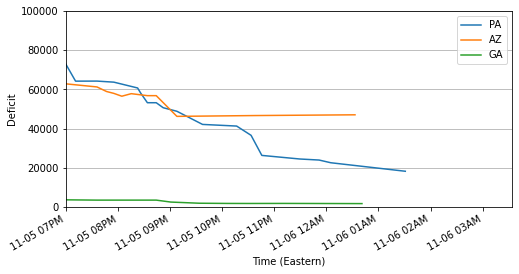

In [11]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
penn.plot(ax=ax, label="PA")
az.plot(ax=ax, label="AZ")
ga.plot(ax=ax, label="GA")
ax.set_xlim(("2020-11-06", None))
ax.set_ylim(min(0, min(ga), min(az), min(penn)), 100000)
ax.set_ylabel("Deficit")
ax.set_xlabel("Time (Eastern)")
fig.set_facecolor("white")
date_form = DateFormatter("%m-%d %I%p")
ax.xaxis.set_major_formatter(date_form)
ax.legend();
ax.grid(axis='y')